# Вступление

Данный датасет содержит данные по характеристикам различных музыкальных треков. Необходимо предсказать жанр трека по представленным признакам. Это может быть применимо для построения рекомендательной системы в музыкальных стриминговых сервисах. 
Описание каждого признака:
1. Artist name - имя исполнителя
2. Track name - название трека
3. popularity - популярность, числовой признак, от 1 до 100
4. danceability - танцевальность трека, от 0 до 1
5. energy - энергичность трека, от 0 до 1
6. key - тональность, категориальный
7. loudness - громкость, числовой признак, принимает как отрицательные, так и положительные значения
8. mode - бинарный признак, сложно восстановить исходное значение
9. speechiness - то, насколько понятна слушателю речь в треке, числовой признак
10. acousticness - отражает использование акустических инструментов, числовой признак
11. instrumentalness - отражает использование музыкальных инструментов в треке, числовой признак
12. liveness - вероятность того, что трек исполнялся вживую,  числовой признак, от 0 до 1 
13. valence - позитивность трека, от 0 до 1
14. tempo - темп, принимает числовое значения больше 0
15. duration_in min/ms - продолжительность трека в миллисекундах, числовой признак
16. time_signature - размер такта, категориальный
17. Class - целевая переменная, жанр музыки

Импортируем библиотеки для работы с данными:

---



In [27]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

импортируем датасет:

In [28]:
df=pd.read_csv('./train.csv',sep=',')

In [29]:
df.head(10)

Artist Name                             Track Name  \
0                 Bruno Mars  That's What I Like (feat. Gucci Mane)   
1                     Boston                           Hitch a Ride   
2              The Raincoats                     No Side to Fall In   
3                       Deno             Lingo (feat. J.I & Chunkz)   
4      Red Hot Chili Peppers      Nobody Weird Like Me - Remastered   
5                The Stooges      Search and Destroy - Iggy Pop Mix   
6              Solomon Burke                    None Of Us Are Free   
7               Randy Travis                      On the Other Hand   
8  Professional Murder Music                                   Slow   
9                Dudu Aharon        ◊ì◊ï◊ì◊ï, ◊ô◊ê◊ú◊ú◊î ◊ô◊ê◊ú◊ú◊î   

   Popularity  danceability  energy   key  loudness  mode  speechiness  \
0        60.0         0.854   0.564   1.0    -4.964     1       0.0485   
1        54.0         0.382   0.814   3.0    -7.230     1       0.0406   
2        35.0         0.434   0.614   6.0    -8.334     1       0.0525   
3        66.0         0.853   0.597  10.0    -6.528     0       0.0555   
4        53.0         0.167   0.975   2.0    -4.279     1       0.2160   
5        53.0         0.235   0.977   6.0     0.878     1       0.1070   
6        48.0         0.674   0.658   5.0    -9.647     0       0.1040   
7        55.0         0.657   0.415   5.0    -9.915     1       0.0250   
8        29.0         0.431   0.776  10.0    -5.403     1       0.0527   
9        14.0         0.716   0.885   1.0    -4.348     0       0.0333   

   acousticness  instrumentalness  liveness  valence    tempo  \
0      0.017100               NaN    0.0849   0.8990  134.071   
1      0.001100          0.004010    0.1010   0.5690  116.454   
2      0.486000          0.000196    0.3940   0.7870  147.681   
3      0.021200               NaN    0.1220   0.5690  107.033   
4      0.000169          0.016100    0.1720   0.0918  199.060   
5      0.003530          0.006040    0.1720   0.2410  152.952   
6      0.404000          0.000001    0.0981   0.6770  143.292   
7      0.175000          0.000006    0.1320   0.3470   96.030   
8      0.000022          0.001300    0.1790   0.3180  120.857   
9      0.061400               NaN    0.2530   0.8330  128.043   

   duration_in min/ms  time_signature  Class  
0       234596.000000               4      5  
1       251733.000000               4     10  
2       109667.000000               4      6  
3       173968.000000               4      5  
4       229960.000000               4     10  
5       208133.000000               4      6  
6       329387.000000               4      2  
7            3.105783               4      4  
8       237867.000000               4      8  
9       164093.000000               4      9

Утечек в датасете нет

In [30]:
df.shape

(17996, 17)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [32]:
df.describe()

Popularity  danceability        energy           key      loudness  \
count  17568.000000  17996.000000  17996.000000  15982.000000  17996.000000   
mean      44.512124      0.543433      0.662777      5.952447     -7.910660   
std       17.426928      0.166268      0.235373      3.196854      4.049151   
min        1.000000      0.059600      0.000020      1.000000    -39.952000   
25%       33.000000      0.432000      0.509000      3.000000     -9.538000   
50%       44.000000      0.545000      0.700000      6.000000     -7.016000   
75%       56.000000      0.659000      0.860000      9.000000     -5.189000   
max      100.000000      0.989000      1.000000     11.000000      1.355000   

               mode   speechiness  acousticness  instrumentalness  \
count  17996.000000  17996.000000  17996.000000      13619.000000   
mean       0.636753      0.079707      0.247082          0.177562   
std        0.480949      0.083576      0.310632          0.304048   
min        0.000000      0.022500      0.000000          0.000001   
25%        0.000000      0.034800      0.004300          0.000089   
50%        1.000000      0.047400      0.081400          0.003910   
75%        1.000000      0.083000      0.434000          0.200000   
max        1.000000      0.955000      0.996000          0.996000   

           liveness       valence         tempo  duration_in min/ms  \
count  17996.000000  17996.000000  17996.000000        1.799600e+04   
mean       0.196170      0.486208    122.623294        2.007445e+05   
std        0.159212      0.240195     29.571527        1.119891e+05   
min        0.011900      0.018300     30.557000        5.016500e-01   
25%        0.097500      0.297000     99.620750        1.663370e+05   
50%        0.129000      0.481000    120.065500        2.091600e+05   
75%        0.258000      0.672000    141.969250        2.524900e+05   
max        1.000000      0.986000    217.416000        1.477187e+06   

       time_signature         Class  
count    17996.000000  17996.000000  
mean         3.924039      6.695821  
std          0.361618      3.206073  
min          1.000000      0.000000  
25%          4.000000      5.000000  
50%          4.000000      8.000000  
75%          4.000000     10.000000  
max          5.000000     10.000000

Проверим, является ли key категориальным:

In [33]:
df['key'].value_counts()

7.0     2097
2.0     1994
9.0     1961
1.0     1680
4.0     1549
11.0    1476
5.0     1397
6.0     1190
8.0     1119
10.0    1010
3.0      509
Name: key, dtype: int64

Посмотрим количество значений в столбцах Artist Name и Track Name:

In [34]:
df['Artist Name'].value_counts()

Backstreet Boys    69
Westlife           60
Britney Spears     54
Omer Adam          48
Eyal Golan         48
                   ..
Rocky Trail         1
Smerz               1
lavender            1
Fear Culture        1
Beherit             1
Name: Artist Name, Length: 9149, dtype: int64

In [35]:
df['Track Name'].value_counts()

Dreams                      9
Fire                        8
Runaway                     8
Home                        7
Ghost                       7
                           ..
Ai tant Montat              1
Otra Noche Sin Ti           1
Showers                     1
Scene Two - Roger Rabbit    1
Broken Boy Soldier          1
Name: Track Name, Length: 15129, dtype: int64

Число значений очень велико, поэтому удалим колонку Track name, а для колонки Artist name сначала посмотрим распределение значений, и либо удалим ее, либо заменим редко встречающихся исполнителей на 'rare', и применим one-hot encoding:

In [36]:
df['Artist Name'].value_counts().mean()

1.96699092797027

Около половины значений меньше 2, поэтому удалим обе колонки из датасета, они являются нерелевантными

In [37]:
df=df.drop(columns='Artist Name')

In [38]:
df=df.drop(columns='Track Name')

Создадим списки из категориальных и числовых признаков:

In [39]:
num_cols=[
    'Popularity',
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_in min/ms'

]
cat_cols=[
    'mode',
    'key',
    'time_signature'
]

In [40]:
feature_cols = num_cols + cat_cols

# Первичная обработка данных. Обработка NaN-ов

Посчитаем число NaN-ов в каждой колонке

In [41]:
df.isnull().sum()

Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

В датасете мало строк, а количество пропущенных значений, особенно в колонках key и instrumentalness, очень велико относительно количества строк, поэтому заменим их медианой

In [42]:
df["key"]=df['key'].fillna(df['key'].median(axis=0),axis=0)

In [43]:
df["Popularity"]=df['Popularity'].fillna(df['Popularity'].median(axis=0),axis=0)

In [44]:
df["instrumentalness"]=df['instrumentalness'].fillna(df['instrumentalness'].median(axis=0),axis=0)

In [45]:
df.isnull().sum()

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

заменим тип данных категориальных признаков на category:

In [46]:
df['key'].describe()

count    17996.000000
mean         5.957768
std          3.012689
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: key, dtype: float64

In [47]:
df['key'].value_counts()

6.0     3204
7.0     2097
2.0     1994
9.0     1961
1.0     1680
4.0     1549
11.0    1476
5.0     1397
8.0     1119
10.0    1010
3.0      509
Name: key, dtype: int64

In [48]:
df['key']=df['key'].astype('int64')
df[cat_cols]=df[cat_cols].astype('category')

In [49]:
df['key'].value_counts()

6     3204
7     2097
2     1994
9     1961
1     1680
4     1549
11    1476
5     1397
8     1119
10    1010
3      509
Name: key, dtype: int64

In [50]:
df['key'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ordered=False)

# Визуализация

Визуализация числовых признаков:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27d29eedf0>,
      dtype=object)

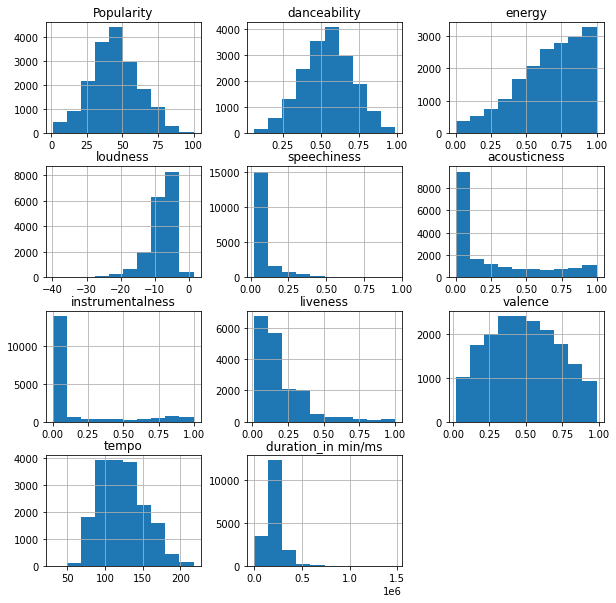

In [27]:
df.hist(column=num_cols,figsize=(10,10))

Фичи Popularity, danceability, loudness, valence, tempo, duration_in min/ms имеют форму нормального распределения. 

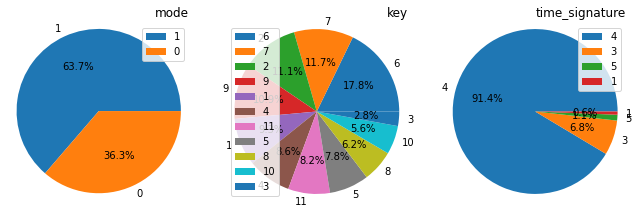

In [28]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(15,15))
for i in range(len(cat_cols)):
    train_counts=df[cat_cols[i]].value_counts()
    plt.subplot(4,4,i+1)
    plt.pie(train_counts, labels = train_counts.index, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(cat_cols[i], loc="right")
    plt.legend()

90% значений time_signature равны 4, что может плохо сказаться на обучении, может понадобиться удаление колонки

In [29]:
df['Class'].head(10)

0     5
1    10
2     6
3     5
4    10
5     6
6     2
7     4
8     8
9     9
Name: Class, dtype: int64

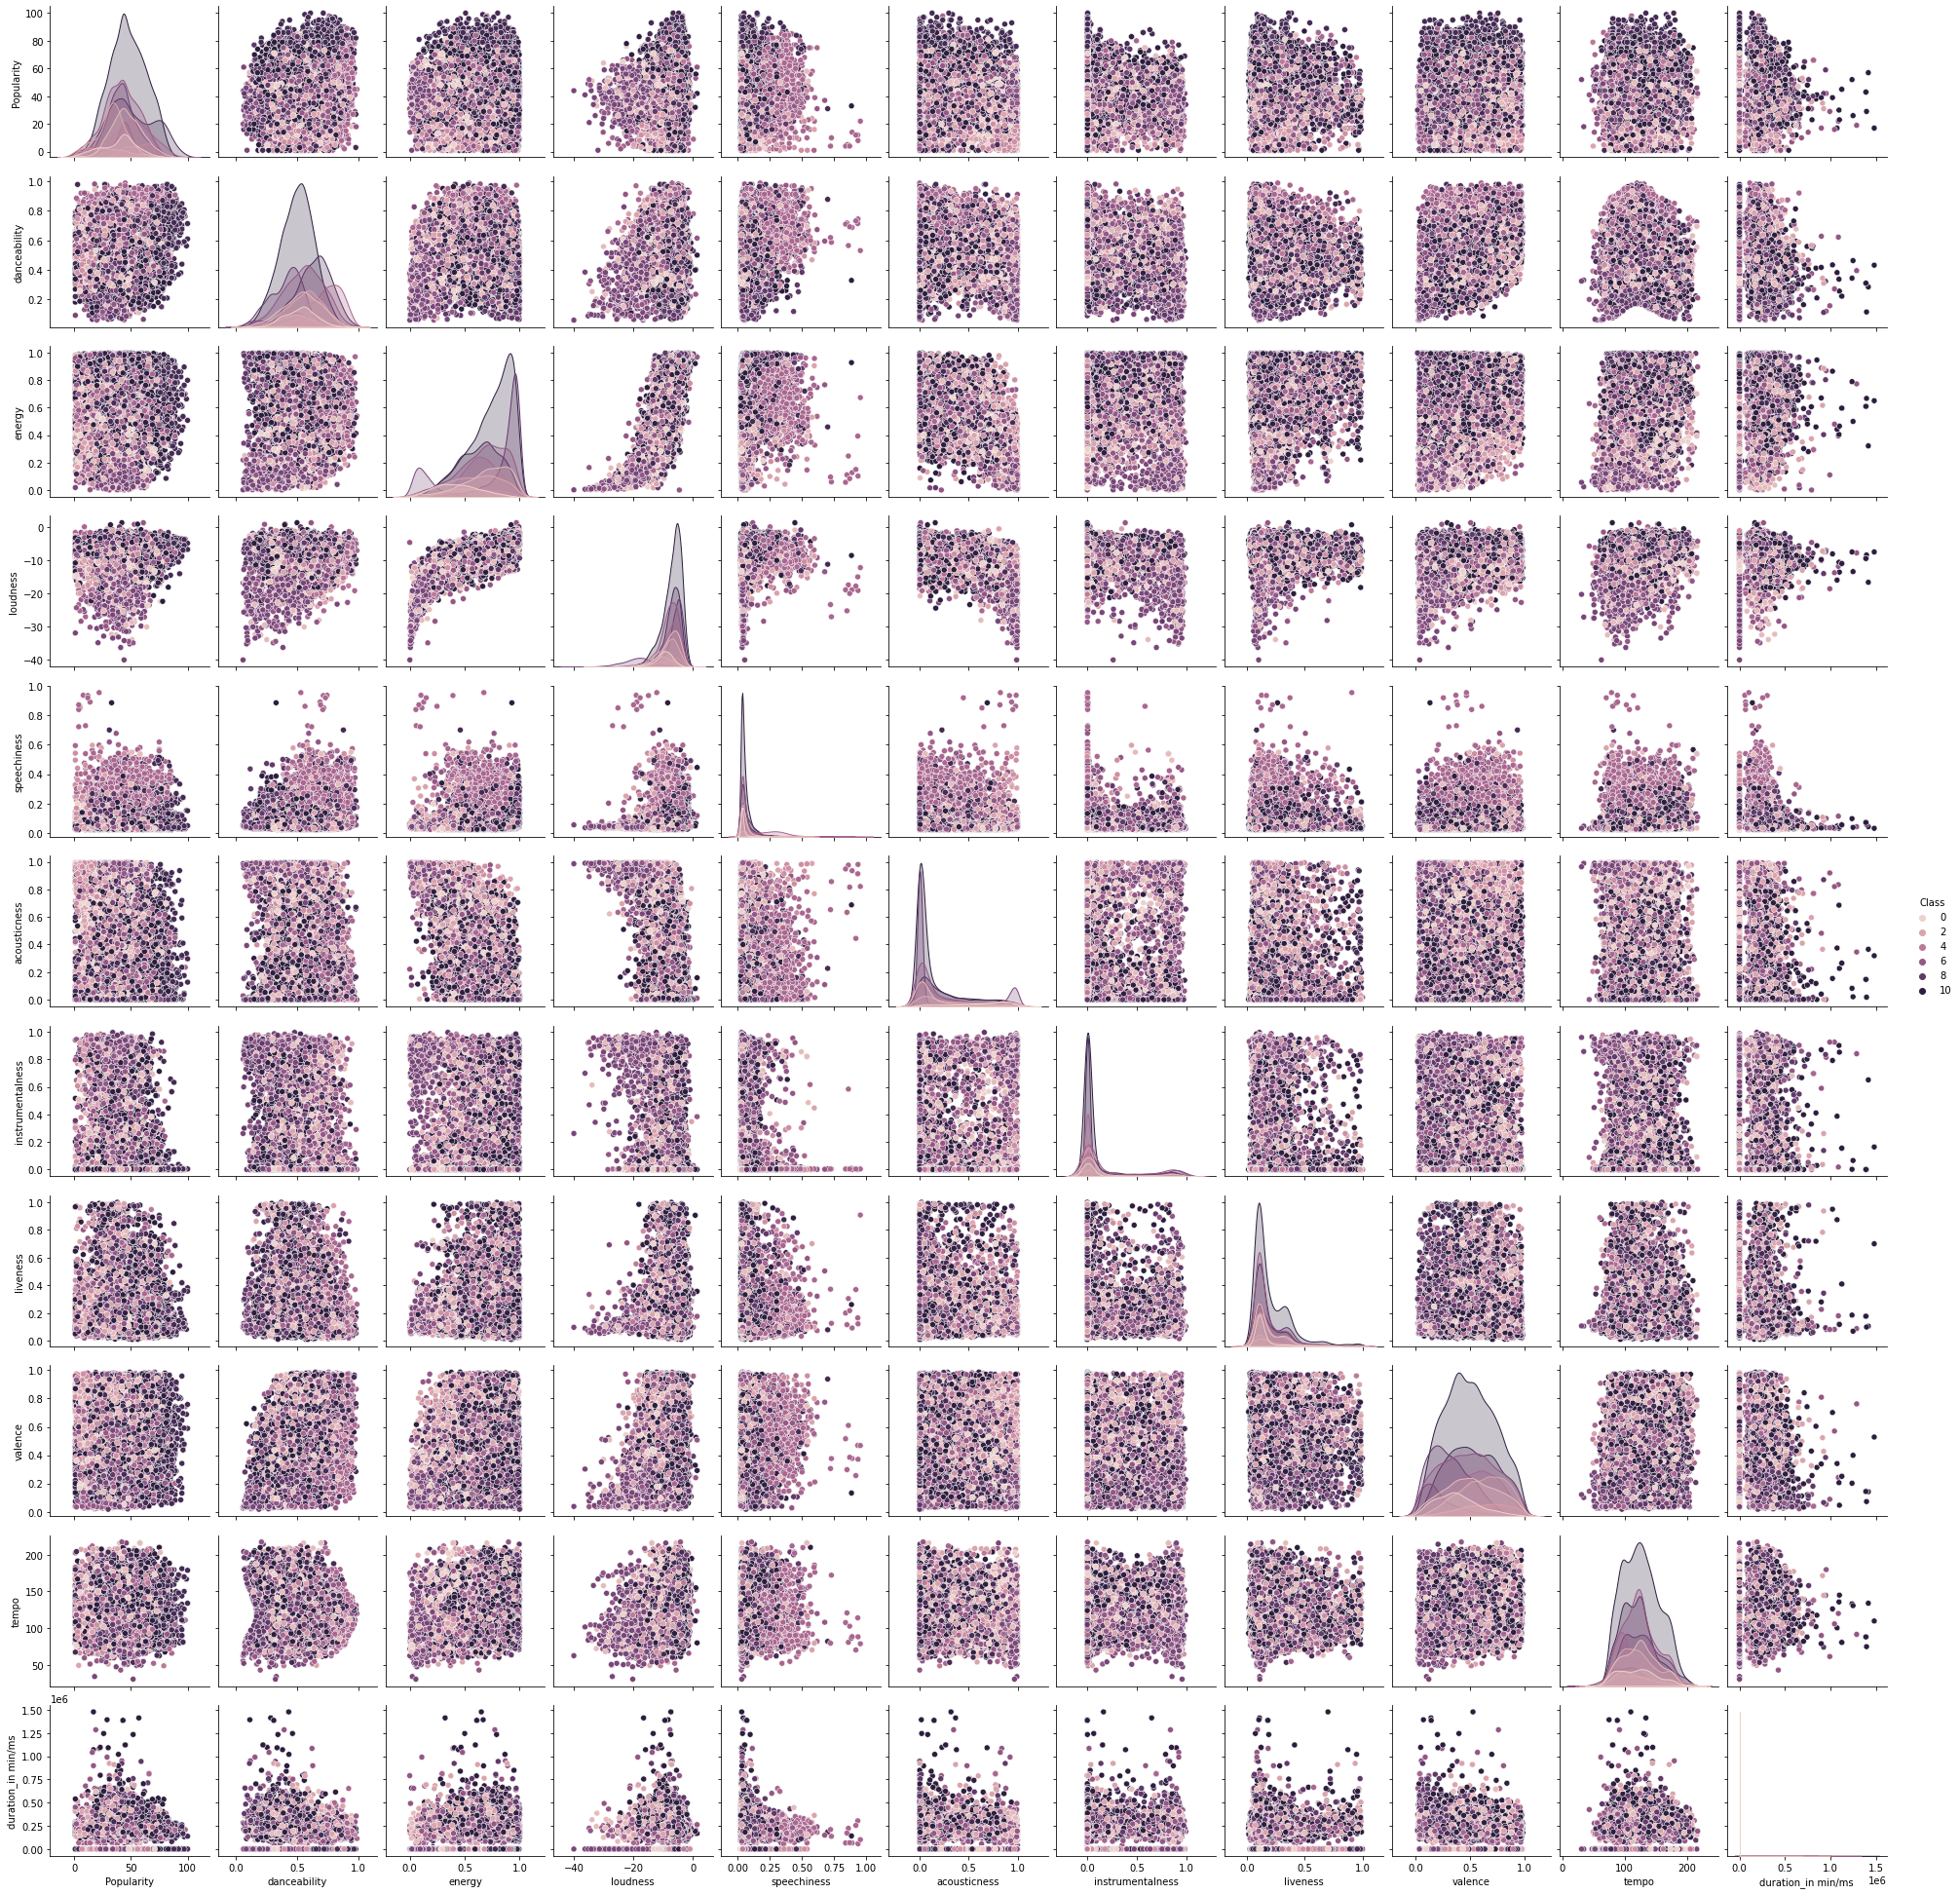

In [30]:
sns.pairplot(df,hue='Class')

In [31]:
df['Class'].value_counts()

10    4949
6     2587
9     2524
8     1854
5     1447
1     1373
2     1272
0      625
7      576
3      402
4      387
Name: Class, dtype: int64

In [32]:
df['Class'].size

17996

In [33]:
df.shape

(17996, 15)

([<matplotlib.patches.Wedge at 0x7f27cacb9dc0>,
 [Text(0.714378271028979, 0.8364590162594021, '10'),
  Text(-0.6290100411264601, 0.902411418457285, '6'),
  Text(-1.0973192628988189, 0.07674917114336272, '9'),
  Text(-0.845248982446434, -0.7039560765227245, '8'),
  Text(-0.3251655259895507, -1.0508412728418783, '5'),
  Text(0.21012447371775286, -1.0797442778476938, '1'),
  Text(0.6691550578141721, -0.8730587085653015, '2'),
  Text(0.9166651188154034, -0.6080502116989539, '0'),
  Text(1.0231438818649357, -0.4039512309702136, '7'),
  Text(1.0769006837341026, -0.2242429873441358, '3'),
  Text(1.0974906173793233, -0.07425863427475475, '4')],
 [Text(0.3896608751067158, 0.45625037250512834, '27.5%'),
  Text(-0.3430963860689782, 0.49222441006761, '14.4%'),
  Text(-0.598537779762992, 0.04186318426001603, '14.0%'),
  Text(-0.4610448995162367, -0.3839760417396679, '10.3%'),
  Text(-0.17736301417611855, -0.5731861488228427, '8.0%'),
  Text(0.11461334930059244, -0.5889514242805601, '7.6%'),
  Text(

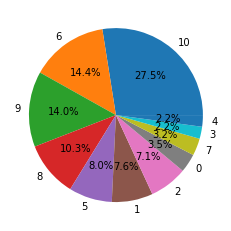

In [34]:
plt.pie(df['Class'].value_counts(),labels=df['Class'].value_counts().index,autopct='%1.1f%%')

По графикам видно, что 10 класс преобладает, составляя 27,9% от общего количества,а например класс 4 составляет лишь  2,2%. 

In [35]:
df.quantile([0.001,0.005,.01,.05,.1,.5,.9,.95,.99,.995,0.999])

Popularity  danceability    energy   loudness  speechiness  \
0.001         1.0      0.082793  0.012299 -30.558745     0.023400   
0.005         2.0      0.122975  0.038997 -25.286825     0.024600   
0.010         4.0      0.153950  0.061395 -22.610850     0.025300   
0.050        16.0      0.261000  0.201750 -15.603750     0.027800   
0.100        23.0      0.326000  0.319000 -12.930000     0.029800   
0.500        44.0      0.545000  0.700000  -7.016000     0.047400   
0.900        68.0      0.762000  0.941500  -3.935000     0.171000   
0.950        74.0      0.818000  0.967000  -3.318000     0.272000   
0.990        84.0      0.905000  0.989000  -2.218000     0.420000   
0.995        87.0      0.929000  0.993000  -1.828850     0.481000   
0.999        95.0      0.962010  0.997000  -1.035950     0.597005   

       acousticness  instrumentalness  liveness   valence       tempo  \
0.001      0.000001          0.000001  0.024999  0.032598   53.902660   
0.005      0.000003          0.000001  0.034495  0.037197   65.806125   
0.010      0.000005          0.000001  0.040500  0.039300   70.965700   
0.050      0.000045          0.000004  0.061200  0.107000   79.529000   
0.100      0.000210          0.000012  0.074400  0.163000   85.374000   
0.500      0.081400          0.003910  0.129000  0.481000  120.065500   
0.900      0.805000          0.704000  0.378000  0.821500  166.107500   
0.950      0.918000          0.862000  0.518000  0.892000  175.705500   
0.990      0.985000          0.934050  0.858050  0.962000  194.000050   
0.995      0.991000          0.946000  0.950000  0.966025  200.317625   
0.999      0.994000          0.964000  0.983000  0.975000  207.920070   

       duration_in min/ms  Class  
0.001            1.703296    0.0  
0.005            2.229320    0.0  
0.010            2.466623    0.0  
0.050            3.384288    1.0  
0.100            4.378108    1.0  
0.500       209160.000000    8.0  
0.900       307247.000000   10.0  
0.950       354629.250000   10.0  
0.990       509169.650000   10.0  
0.995       590764.675000   10.0  
0.999       943562.405000   10.0

Очень сильных выбросов нет

Построим корреляционную матрицу:

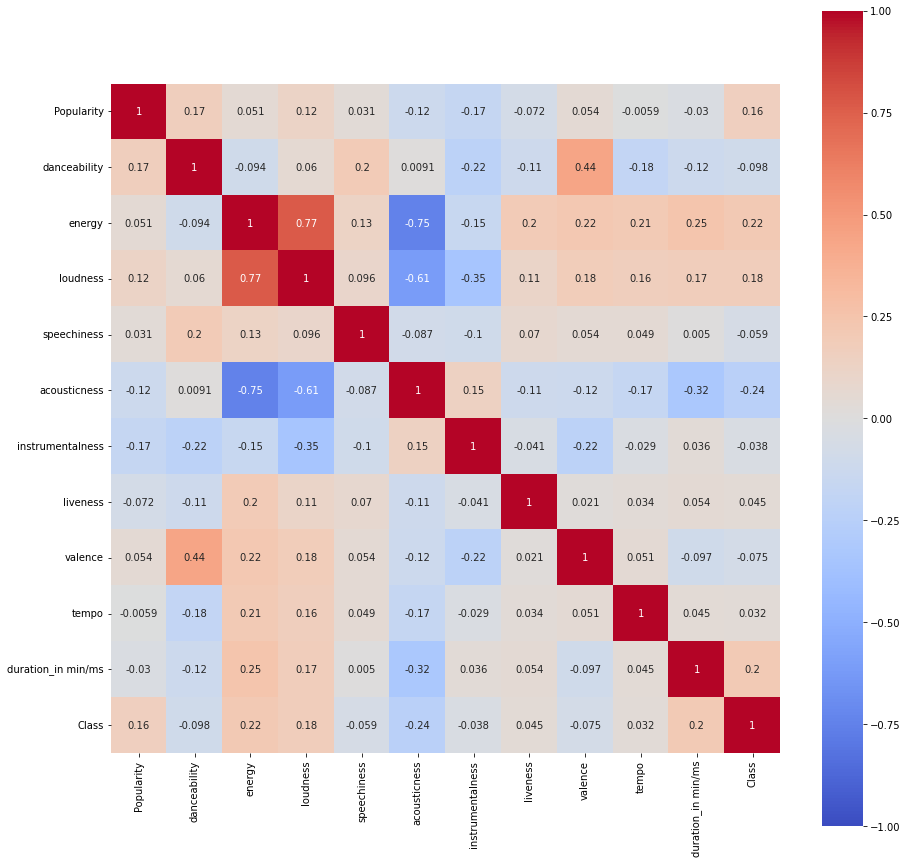

In [36]:
fig, ax = plt.subplots(figsize=(15, 15))

#create heatmap
sns.heatmap(df.corr(),square=True, annot=True, vmin=-1, vmax=1, cmap='coolwarm')

energy и acousticness довольно сильно отрицательно коррелируют друг с другом(-0.75), как и acousticness и loudness(-0.61), а valence и danceability сильно положительно коррелируют друг с другом(0.44). duration_in min/ms, acousticness,loudness, energy и popularity коррелируют с целевой переменной со значением корреляции >0.1 по модулю.

# Окончательная предобработка


разделим признаки и целевую переменную

In [51]:
y=df['Class']
X=df.drop(columns='Class')

разделим датасет на обучающую и тестовую выборки

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=49)

Применим one-hot encoding к категориальным фичам:

In [54]:
X_train = pd.get_dummies(X_train, columns=cat_cols)
X_train

Popularity  danceability  energy  loudness  speechiness  acousticness  \
14339        35.0         0.542   0.467    -7.453       0.0478      0.948000   
8761         39.0         0.556   0.541    -6.018       0.0292      0.004760   
8346         44.0         0.623   0.965    -3.157       0.3760      0.001350   
10630        60.0         0.781   0.746    -6.327       0.3800      0.503000   
12274        29.0         0.258   0.446    -6.747       0.0341      0.612000   
...           ...           ...     ...       ...          ...           ...   
13196        41.0         0.663   0.835    -5.194       0.0446      0.003900   
8050         46.0         0.694   0.831    -7.963       0.0448      0.000868   
7924         35.0         0.341   0.473    -7.097       0.0339      0.389000   
15861        57.0         0.705   0.476    -9.039       0.0894      0.684000   
426          37.0         0.655   0.648    -8.708       0.0345      0.102000   

       instrumentalness  liveness  valence    tempo  ...  key_6  key_7  key_8  \
14339          0.000596    0.1900    0.293   66.012  ...      0      0      0   
8761           0.017100    0.1280    0.553   96.531  ...      0      0      0   
8346           0.000002    0.4820    0.346  134.066  ...      1      0      0   
10630          0.003910    0.1060    0.858   95.730  ...      0      0      0   
12274          0.003910    0.0749    0.272  175.466  ...      1      0      0   
...                 ...       ...      ...      ...  ...    ...    ...    ...   
13196          0.000388    0.5940    0.327  140.023  ...      1      0      0   
8050           0.395000    0.6530    0.101  101.989  ...      0      0      0   
7924           0.000038    0.2730    0.200  132.764  ...      0      0      0   
15861          0.003910    0.1600    0.757  134.947  ...      0      0      0   
426            0.003910    0.0946    0.712  125.603  ...      0      0      0   

       key_9  key_10  key_11  time_signature_1  time_signature_3  \
14339      0       0       0                 0                 1   
8761       0       0       0                 0                 0   
8346       0       0       0                 0                 0   
10630      0       0       0                 0                 0   
12274      0       0       0                 0                 1   
...      ...     ...     ...               ...               ...   
13196      0       0       0                 0                 0   
8050       0       0       0                 0                 0   
7924       1       0       0                 0                 0   
15861      0       0       1                 0                 0   
426        0       0       0                 0                 0   

       time_signature_4  time_signature_5  
14339                 0                 0  
8761                  1                 0  
8346                  1                 0  
10630                 1                 0  
12274                 0                 0  
...                 ...               ...  
13196                 1                 0  
8050                  1                 0  
7924                  1                 0  
15861                 0                 1  
426                   1                 0  

[13497 rows x 28 columns]

In [55]:
X_train.shape

(13497, 28)

In [56]:
y_train.size

13497

In [57]:
y_train

14339    2
8761     1
8346     6
10630    9
12274    5
        ..
13196    8
8050     6
7924     2
15861    9
426      2
Name: Class, Length: 13497, dtype: int64

In [58]:
y_test

15271     9
648       2
2364      6
2901     10
6160      9
         ..
5781      1
7423     10
15766     5
13679     3
8474     10
Name: Class, Length: 4499, dtype: int64

Проведем масштабирование количественных признаков:

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [60]:
X_train

Popularity  danceability    energy  loudness  speechiness  \
14339   -0.552971     -0.011612 -0.825528  0.116583    -0.377896   
8761    -0.321158      0.072860 -0.512028  0.470784    -0.600702   
8346    -0.031392      0.477121  1.284245  1.176965     3.553557   
10630    0.895860      1.430453  0.356453  0.394513     3.601472   
12274   -0.900690     -1.725197 -0.914495  0.290845    -0.542006   
...           ...           ...       ...       ...          ...   
13196   -0.205251      0.718471  0.733501  0.674172    -0.416228   
8050     0.084515      0.905517  0.716555 -0.009301    -0.413832   
7924    -0.552971     -1.224396 -0.800110  0.204454    -0.544401   
15861    0.722000      0.971888 -0.787400 -0.274890     0.120424   
426     -0.437064      0.670201 -0.058723 -0.193189    -0.537214   

       acousticness  instrumentalness  liveness   valence     tempo  ...  \
14339      2.243235         -0.488021 -0.037602 -0.801488 -1.915086  ...   
8761      -0.784751         -0.427554 -0.428232  0.280312 -0.882050  ...   
8346      -0.795698         -0.490196  1.802141 -0.580967  0.388471  ...   
10630      0.814698         -0.475880 -0.566843  1.549347 -0.909163  ...   
12274      1.164609         -0.475880 -0.762789 -0.888864  1.789818  ...   
...             ...               ...       ...       ...       ...  ...   
13196     -0.787512         -0.488784  2.507796 -0.660022  0.590109  ...   
8050      -0.797245          0.957001  2.879525 -1.600356 -0.697302  ...   
7924       0.448735         -0.490065  0.485339 -1.188440  0.344400  ...   
15861      1.395743         -0.475880 -0.226617  1.129109  0.418292  ...   
426       -0.472591         -0.475880 -0.638669  0.941875  0.102007  ...   

          key_6     key_7     key_8     key_9    key_10    key_11  \
14339 -0.467055 -0.362422 -0.258433 -0.349073 -0.243077 -0.297583   
8761  -0.467055 -0.362422 -0.258433 -0.349073 -0.243077 -0.297583   
8346   2.141073 -0.362422 -0.258433 -0.349073 -0.243077 -0.297583   
10630 -0.467055 -0.362422 -0.258433 -0.349073 -0.243077 -0.297583   
12274  2.141073 -0.362422 -0.258433 -0.349073 -0.243077 -0.297583   
...         ...       ...       ...       ...       ...       ...   
13196  2.141073 -0.362422 -0.258433 -0.349073 -0.243077 -0.297583   
8050  -0.467055 -0.362422 -0.258433 -0.349073 -0.243077 -0.297583   
7924  -0.467055 -0.362422 -0.258433  2.864731 -0.243077 -0.297583   
15861 -0.467055 -0.362422 -0.258433 -0.349073 -0.243077  3.360409   
426   -0.467055 -0.362422 -0.258433 -0.349073 -0.243077 -0.297583   

       time_signature_1  time_signature_3  time_signature_4  time_signature_5  
14339         -0.083296          3.695230         -3.250470         -0.107079  
8761          -0.083296         -0.270619          0.307648         -0.107079  
8346          -0.083296         -0.270619          0.307648         -0.107079  
10630         -0.083296         -0.270619          0.307648         -0.107079  
12274         -0.083296          3.695230         -3.250470         -0.107079  
...                 ...               ...               ...               ...  
13196         -0.083296         -0.270619          0.307648         -0.107079  
8050          -0.083296         -0.270619          0.307648         -0.107079  
7924          -0.083296         -0.270619          0.307648         -0.107079  
15861         -0.083296         -0.270619         -3.250470          9.338934  
426           -0.083296         -0.270619          0.307648         -0.107079  

[13497 rows x 28 columns]

# предобработка тестовой части

In [61]:
X_test = pd.get_dummies(X_test, columns=cat_cols)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [63]:
y_test

15271     9
648       2
2364      6
2901     10
6160      9
         ..
5781      1
7423     10
15766     5
13679     3
8474     10
Name: Class, Length: 4499, dtype: int64

# Обучение 1. KNN

Будем использовать one-vs-rest для обучения

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
knn = KNeighborsClassifier(10)

In [51]:
from sklearn.multiclass import OneVsRestClassifier

Проведем кросс-валидацию с помощью KFold:

In [52]:
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from tqdm import tqdm

cv = KFold(n_splits=5)
errors = []

for train_idx, val_idx in tqdm(cv.split(X_train)):
    X_traincross, y_traincross = X_train.iloc[train_idx], y_train.iloc[train_idx]
    X_val, y_val = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    clf=OneVsRestClassifier(knn).fit(X_traincross, y_traincross)
    pred_val = clf.predict_proba(X_val)
    errors.append(
        log_loss(y_val,pred_val)
    )

print()
print('Metrics')
print(errors)
print('Log loss=', np.mean(errors))

5it [00:27,  5.41s/it]


Metrics
[5.346591013184393, 5.007679969091048, 4.970950579398839, 4.819952239172102, 5.178030524565351]
Log loss= 5.064640865082347


# Обучение 2. Метод опорных векторов

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import jaccard_score
clf = OneVsRestClassifier(SVC(probability=True)).fit(X_train, y_train)

In [54]:
f1_score(y_test,clf.predict(X_test),average="macro",zero_division=0)

0.5025380837672166

In [55]:
jaccard_score(y_test,clf.predict(X_test),average="macro")

0.3600326049315077

In [56]:
log_loss(y_test,clf.predict_proba(X_test))

1.453382738517978

# Обучение 3.1 Градиентный бустинг с помощью catboost

In [64]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
import catboost

In [66]:
from sklearn.model_selection import GridSearchCV

In [125]:
df['Class'].shape, df[feature_cols].shape

((17996,), (17996, 14))

In [134]:
X_train, X_remaining, y_train, y_remaining = train_test_split(df[feature_cols],df['Class'], train_size=0.8)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining,y_remaining, test_size=0.5)

In [135]:
boosting_model = catboost.CatBoostClassifier(n_estimators=1000, learning_rate=0.005,
                                             cat_features=cat_cols,task_type="GPU")

boosting_model.fit(X_train,y_train,plot=True,verbose=35,eval_set=(X_valid,y_valid))
y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_valid_predicted = boosting_model.predict_proba(X_valid)[:, 1]
print(f"Model params: {boosting_model.get_params()}")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.3874145	test: 2.3874319	best: 2.3874319 (0)	total: 31.5ms	remaining: 31.4s
35:	learn: 2.1147978	test: 2.1159089	best: 2.1159089 (35)	total: 973ms	remaining: 26.1s
70:	learn: 1.9412371	test: 1.9440971	best: 1.9440971 (70)	total: 2.01s	remaining: 26.3s
105:	learn: 1.8169557	test: 1.8211631	best: 1.8211631 (105)	total: 2.54s	remaining: 21.4s
140:	learn: 1.7224548	test: 1.7279005	best: 1.7279005 (140)	total: 3.06s	remaining: 18.7s
175:	learn: 1.6478278	test: 1.6545291	best: 1.6545291 (175)	total: 3.59s	remaining: 16.8s
210:	learn: 1.5879041	test: 1.5962842	best: 1.5962842 (210)	total: 4.12s	remaining: 15.4s
245:	learn: 1.5387273	test: 1.5492654	best: 1.5492654 (245)	total: 4.63s	remaining: 14.2s
280:	learn: 1.4983782	test: 1.5110813	best: 1.5110813 (280)	total: 5.16s	remaining: 13.2s
315:	learn: 1.4645720	test: 1.4795433	best: 1.4795433 (315)	total: 5.67s	remaining: 12.3s
350:	learn: 1.4359120	test: 1.4531718	best: 1.4531718 (350)	total: 6.21s	remaining: 11.5s
385:	learn: 1.411

In [136]:
pred=boosting_model.predict(X_valid)

In [137]:
from sklearn.metrics import f1_score
f1_score(y_valid,pred,average="macro",zero_division=0)

0.5276911372802598

In [139]:
from sklearn.metrics import log_loss
log_loss(y_valid,boosting_model.predict_proba(X_valid))

1.2659897294317828

# Обучение 3.2 Градиентный бустинг с помощью catboost. Поиск оптимальных гиперпараметров

In [68]:
params = {'learning_rate':np.arange(0.05,0.12,0.01), 'iterations':np.arange(100,301,50), 'depth':np.arange(2,6,1),'min_data_in_leaf': np.arange(1,11,2)}

In [70]:
boosting_model2 = catboost.CatBoostClassifier(cat_features=cat_cols, random_seed=1, verbose=False,task_type="GPU")
result = boosting_model2.grid_search(params, X_train, y_train)
y_train_predicted2 = boosting_model2.predict_proba(X_train)[:, 1]
y_valid_predicted2 = boosting_model2.predict_proba(X_valid)[:, 1]

bestTest = 1.447566393
bestIteration = 99
0:	loss: 1.4475664	best: 1.4475664 (0)	total: 923ms	remaining: 10m 45s
bestTest = 1.417781321
bestIteration = 99
1:	loss: 1.4177813	best: 1.4177813 (1)	total: 1.8s	remaining: 10m 30s
bestTest = 1.390475972
bestIteration = 99
2:	loss: 1.3904760	best: 1.3904760 (2)	total: 2.61s	remaining: 10m 6s
bestTest = 1.371043396
bestIteration = 99
3:	loss: 1.3710434	best: 1.3710434 (3)	total: 3.42s	remaining: 9m 54s
bestTest = 1.354928335
bestIteration = 99
4:	loss: 1.3549283	best: 1.3549283 (4)	total: 4.21s	remaining: 9m 45s
bestTest = 1.341906823
bestIteration = 99
5:	loss: 1.3419068	best: 1.3419068 (5)	total: 5s	remaining: 9m 38s
bestTest = 1.326231723
bestIteration = 99
6:	loss: 1.3262317	best: 1.3262317 (6)	total: 5.8s	remaining: 9m 34s
bestTest = 1.379564667
bestIteration = 149
7:	loss: 1.3795647	best: 1.3262317 (6)	total: 6.95s	remaining: 10m 1s
bestTest = 1.354582893
bestIteration = 149
8:	loss: 1.3545829	best: 1.3262317 (6)	total: 8.09s	remaining: 

In [157]:
result['params']

{'min_data_in_leaf': 1,
 'depth': 5,
 'iterations': 300,
 'learning_rate': 0.08000000000000002}

In [73]:
pred=boosting_model2.predict(X_valid)

In [140]:
from sklearn.metrics import f1_score
f1_score(y_valid,pred,average="macro",zero_division=0)


0.5276911372802598

In [141]:
from sklearn.metrics import log_loss
log_loss(y_valid,boosting_model2.predict_proba(X_valid))

1.0722616714369504

# Обучение 3.3 Градиентный бустинг с помощью catboost. Поиск оптимальной глубины дерева

In [142]:
params2 = {'depth':np.arange(2,10,1)}

In [143]:
boosting_model3 = catboost.CatBoostClassifier(cat_features=cat_cols, learning_rate=0.08,iterations=500, random_seed=1, verbose=False,task_type="GPU",min_data_in_leaf= 1)
result3 = boosting_model3.grid_search(params2, X_train, y_train)
y_train_predicted3 = boosting_model3.predict_proba(X_train)[:, 1]
y_valid_predicted3 = boosting_model3.predict_proba(X_valid)[:, 1]

bestTest = 1.211446635
bestIteration = 499
0:	loss: 1.2114466	best: 1.2114466 (0)	total: 3.81s	remaining: 26.7s
bestTest = 1.18212577
bestIteration = 499
1:	loss: 1.1821258	best: 1.1821258 (1)	total: 7.96s	remaining: 23.9s
bestTest = 1.170902676
bestIteration = 499
2:	loss: 1.1709027	best: 1.1709027 (2)	total: 12.6s	remaining: 21s
bestTest = 1.166166602
bestIteration = 498
3:	loss: 1.1661666	best: 1.1661666 (3)	total: 19.4s	remaining: 19.4s
bestTest = 1.166172791
bestIteration = 391
4:	loss: 1.1661728	best: 1.1661666 (3)	total: 26.6s	remaining: 15.9s
bestTest = 1.182532586
bestIteration = 334
5:	loss: 1.1825326	best: 1.1661666 (3)	total: 36.6s	remaining: 12.2s
bestTest = 1.194585334
bestIteration = 216
6:	loss: 1.1945853	best: 1.1661666 (3)	total: 52.2s	remaining: 7.45s
bestTest = 1.21381446
bestIteration = 176
7:	loss: 1.2138145	best: 1.1661666 (3)	total: 1m 18s	remaining: 0us
Estimating final quality...
Training on fold [0/3]
bestTest = 1.20015636
bestIteration = 411
Training on fold

In [144]:
result3["params"]

{'depth': 5}

Оптимальная глубина равна 5, как и при предыдущем поиске оптимальных гиперпараметров

In [145]:
pred3=boosting_model3.predict(X_valid)

In [146]:
from sklearn.metrics import f1_score
f1_score(y_valid,pred3,average="macro",zero_division=0)


0.5775932554363472

In [147]:
from sklearn.metrics import log_loss
log_loss(y_valid,boosting_model3.predict_proba(X_valid))

1.1840719030649356

# Обучение 3.3 Градиентный бустинг с помощью catboost. Финальное обучение с подобранными гиперпараметрами и с большим числом итераций

In [148]:
boosting_model4 = catboost.CatBoostClassifier(cat_features=cat_cols, random_seed=42,task_type="GPU",learning_rate=0.08,iterations=1500,min_data_in_leaf=1,depth=5,loss_function="MultiClassOneVsAll")
boosting_model4.fit(X_train,y_train,plot=True,verbose=35,eval_set=(X_valid,y_valid))
y_train_predicted4 = boosting_model4.predict_proba(X_train)[:, 1]
y_valid_predicted4 = boosting_model4.predict_proba(X_valid)[:, 1]

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6373732	test: 0.6373636	best: 0.6373636 (0)	total: 14.3ms	remaining: 21.4s
35:	learn: 0.2145844	test: 0.2158581	best: 0.2158581 (35)	total: 489ms	remaining: 19.9s
70:	learn: 0.1870763	test: 0.1903332	best: 0.1903332 (70)	total: 884ms	remaining: 17.8s
105:	learn: 0.1780269	test: 0.1834571	best: 0.1834571 (105)	total: 1.25s	remaining: 16.5s
140:	learn: 0.1729059	test: 0.1804244	best: 0.1804244 (140)	total: 1.64s	remaining: 15.8s
175:	learn: 0.1691508	test: 0.1787199	best: 0.1787199 (175)	total: 2.02s	remaining: 15.2s
210:	learn: 0.1663309	test: 0.1775391	best: 0.1775391 (210)	total: 2.39s	remaining: 14.6s
245:	learn: 0.1638954	test: 0.1769685	best: 0.1769685 (245)	total: 2.74s	remaining: 14s
280:	learn: 0.1619062	test: 0.1764845	best: 0.1764845 (280)	total: 3.11s	remaining: 13.5s
315:	learn: 0.1598679	test: 0.1761475	best: 0.1761475 (315)	total: 3.49s	remaining: 13.1s
350:	learn: 0.1579576	test: 0.1759271	best: 0.1758976 (348)	total: 3.84s	remaining: 12.6s
385:	learn: 0.15630

In [149]:
pred4=boosting_model4.predict(X_valid)

In [150]:
from sklearn.metrics import f1_score
f1_score(y_valid,pred4,average="macro",zero_division=0)


0.5724428114596024

In [151]:
from sklearn.metrics import log_loss
log_loss(y_valid,boosting_model4.predict_proba(X_valid))

1.1942654727604987

подсчет log loss на тестовом датасете:

In [152]:
log_loss(y_test,boosting_model4.predict_proba(X_test))

1.1642574252874374

# **Итог**

1.1604337381425159 - итоговое качество, вычисленное по метрике log loss, получившееся при использовании последней модели на валидационном датасете. Для сравнения, в хакатоне, из которого взят этот датасет, это соответствовало бы 33 месту из 123 на открытой части датасета.

Градиентный бустинг показал себя лучше, чем KNN и SVC. При использовании KNN результат оказался не очень. В целом я доволен результатами, я очень многое вспомнил и повторил благодаря решению данной задачи. 